# DebtRank using Renormalizable model

## Generating networks with RM

In [1]:
import igraph as ig
import numpy as np
from src import renormalizable_model

#### Testing

In [8]:
strenghts = [(1,1), (0,1), (0,0), (50, 50)]
n=len(strenghts)
g1 = renormalizable_model.create_RM_graph(strenghts, z=0)
g2 = renormalizable_model.create_RM_graph(strenghts, z=1)
g3 = renormalizable_model.create_RM_graph(strenghts, z=np.infty)

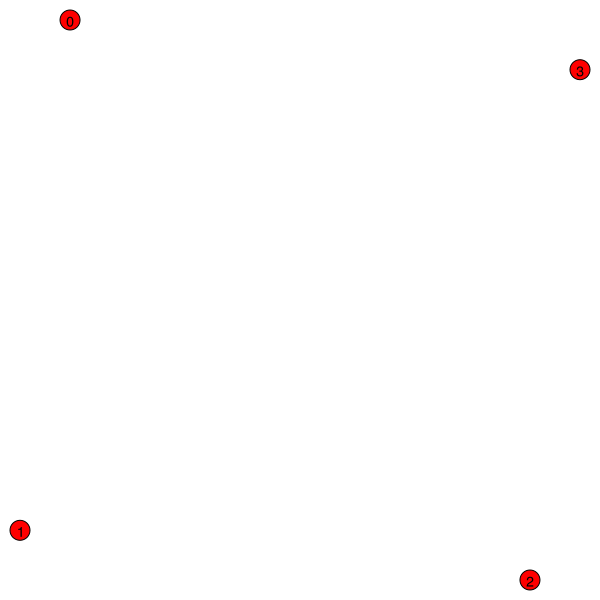

In [9]:
ig.plot(g1, vertex_label=range(n))

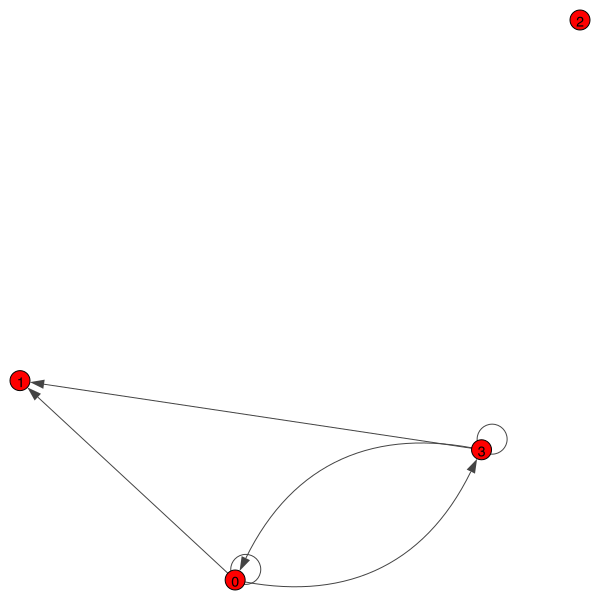

In [10]:
ig.plot(g2, vertex_label=range(n))

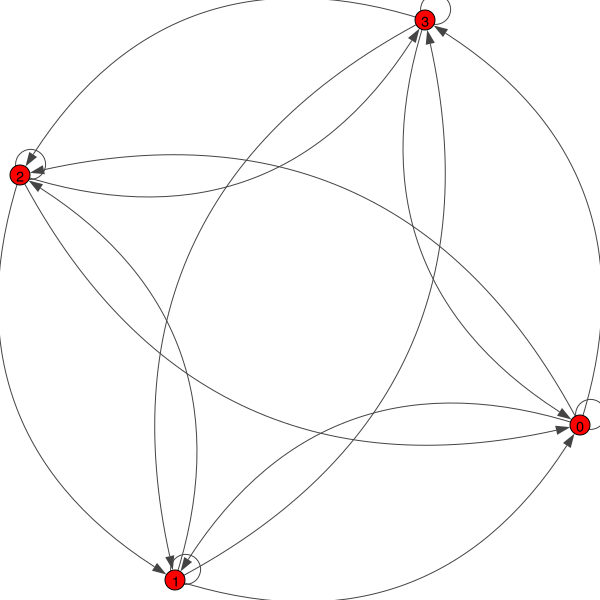

In [11]:
ig.plot(g3, vertex_label=range(n))

In [12]:
g4 = renormalizable_model.create_RM_graph(strenghts, z=1, weighted=True)

Exception: Inconsistent weights

In [ ]:
strenghts_2 = [(1,1), (2,0), (0, 50), (50, 2)]
g5 = renormalizable_model.create_RM_graph(strenghts_2, z=1, weighted=True)

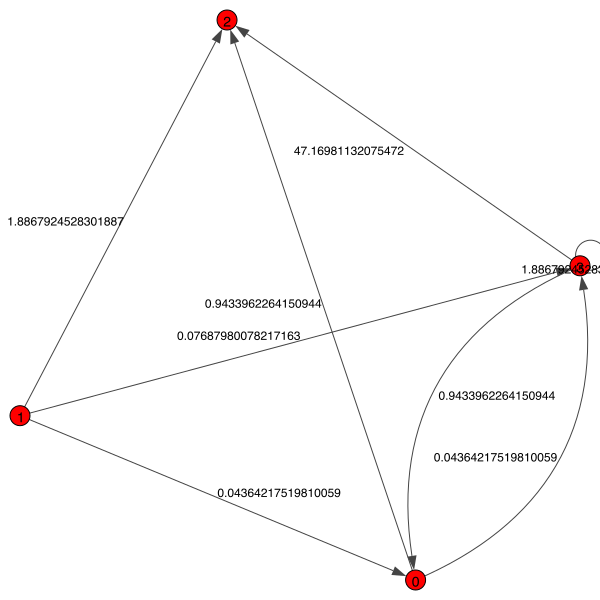

In [ ]:
ig.plot(g5, vertex_label=range(n), edge_label = g5.es["weight"])

In [ ]:
strenghts_2 = [(1,1), (2,0), (0, 50), (50, 2)]
g6 = renormalizable_model.create_RM_graph(strenghts_2, z=np.infty, weighted=True)

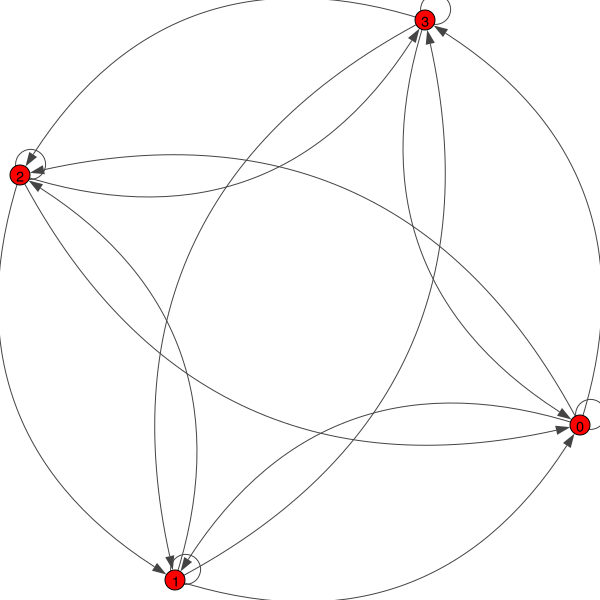

In [ ]:
ig.plot(g6, vertex_label=range(n))

## Coarse graining

#### Merging nodes

In [ ]:
from src import coarse_graining

In [ ]:
g = ig.Graph(5, [(0,1), (0,2), (1,2), (1,3), (4,2), (0,4)], directed=True)
g.es["weight"] = [1,2,3,4,5,6]

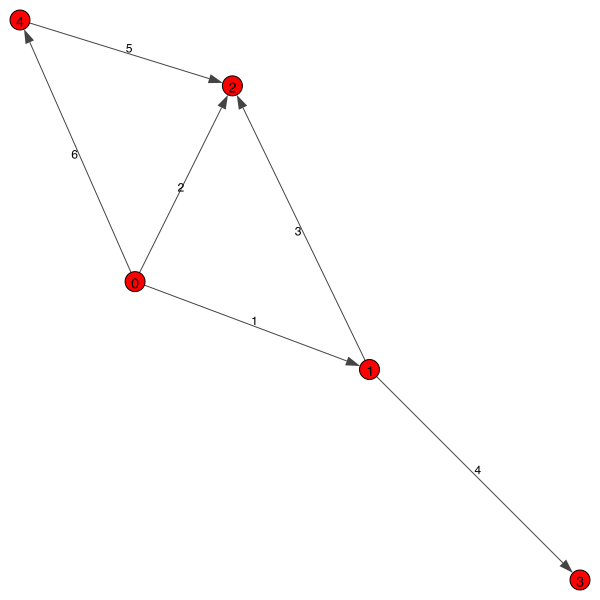

In [ ]:
ig.plot(g, vertex_label=g.vs.indices, edge_label = g.es["weight"])

In [ ]:
group_sequence = coarse_graining.divide_graph_equally(g, 2)
print(group_sequence)
g_coarse_grained = coarse_graining.coarse_grain_weighted_graph(g, group_sequence)

[array([0, 1, 2]), array([3, 4])]


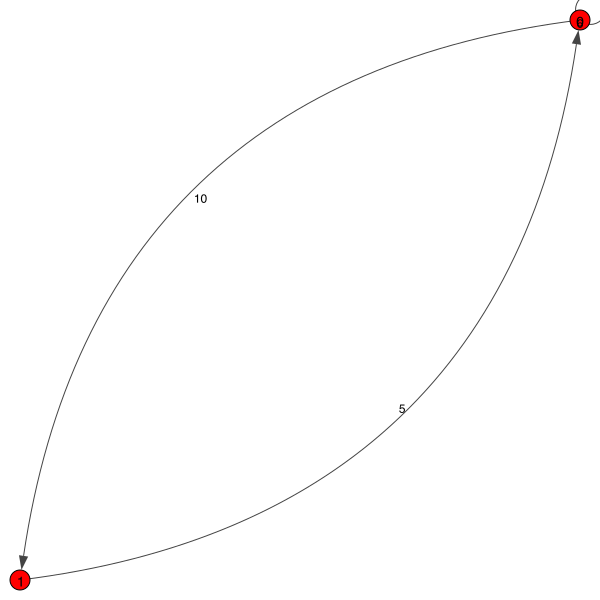

In [ ]:
ig.plot(g_coarse_grained, vertex_label=g_coarse_grained.vs.indices, edge_label = g_coarse_grained.es["weight"])

In [ ]:
group_sequence = coarse_graining.merge_n_group(g, int(len(g.vs.indices)/2))
print(group_sequence)
g_coarse_grained2 = coarse_graining.coarse_grain_weighted_graph(g, group_sequence)

[[0, 1], [2], [3], [4]]


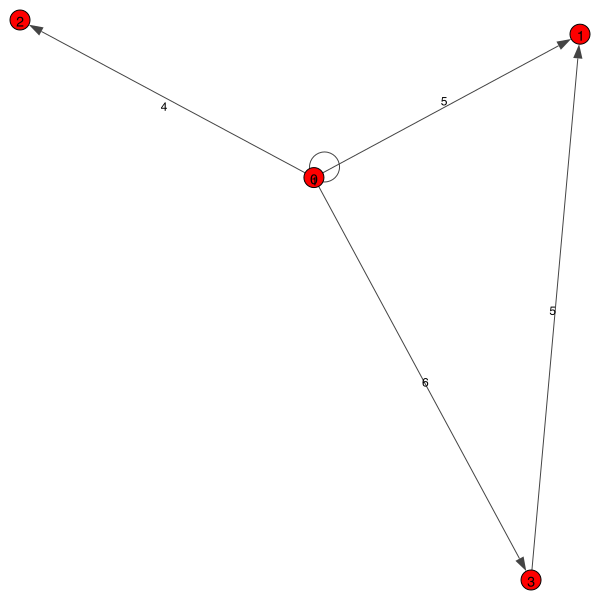

In [ ]:
ig.plot(g_coarse_grained2, vertex_label=g_coarse_grained2.vs.indices, edge_label = g_coarse_grained2.es["weight"])

## Network properties

In [6]:
from src import network_properties
from matplotlib import pyplot as plt

In [5]:
sigma = 2.28
mu = -(sigma**2)/2
#strenghts = renormalizable_model.make_strenghts_consistent(np.random.lognormal(mean=mu, sigma=sigma, size=[500,2]))
gen_strenghts = np.random.lognormal(mean=mu, sigma=sigma, size=500)
strenghts = np.stack([gen_strenghts, gen_strenghts], axis=1)
z = 1

In [7]:
graph = renormalizable_model.create_RM_graph(strenghts, z, weighted=True)

### Clustering coefficient

/Volumes/Datový disk/FJFI/Leiden/Research/Renormalization-Network-Reconstruction/src/network_properties.py:32: RuntimeWarning: invalid value encountered in divide
  clustering_coeff_k = clustering_coeff_k/degree_hist


Text(0, 0.5, '$\\overline{C}(k)$')

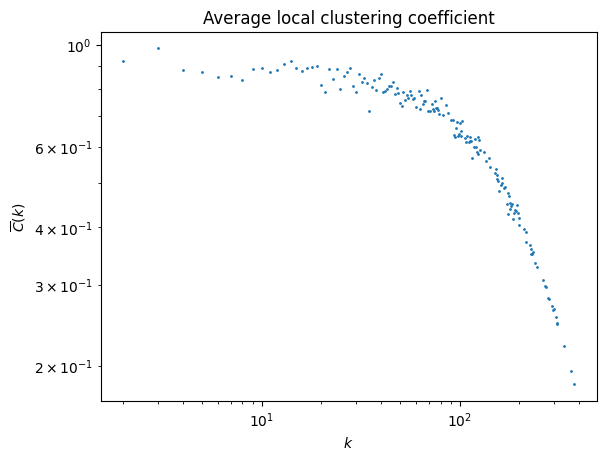

In [ ]:
_, c_k = network_properties.clustering_coeff(graph)
plt.scatter(range(1, len(c_k)+1), c_k, s=1)
plt.xscale('log')
plt.yscale('log')
plt.title('Average local clustering coefficient')
plt.xlabel(r'$k$')
plt.ylabel(r'$\overline{C}(k)$')

### Average nearest neighbor degree

Text(0, 0.5, '$\\overline{k^{nn}}(k)$')

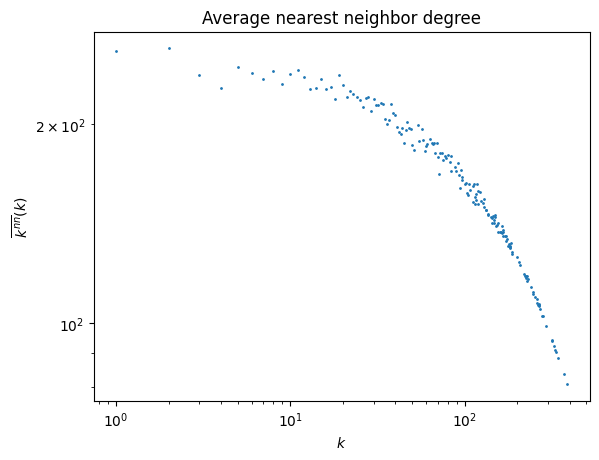

In [ ]:
_, annd_k = network_properties.annd(graph, mode='all')
plt.scatter(range(1, len(annd_k)+1), annd_k, s=1)
plt.xscale('log')
plt.yscale('log')
plt.title('Average nearest neighbor degree')
plt.xlabel(r'$k$')
plt.ylabel(r'$\overline{k^{nn}}(k)$')

Text(0, 0.5, '$\\overline{k^{nn}_{out}}(k_{out})$')

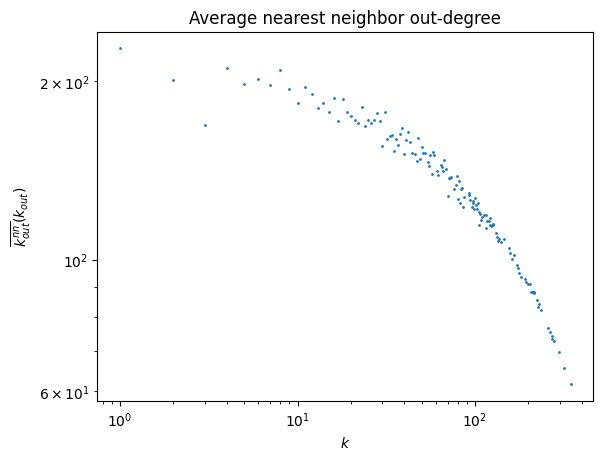

In [ ]:
from matplotlib import pyplot as plt
_, annd_k_out = network_properties.annd(graph, mode='out')
plt.scatter(range(1, len(annd_k_out)+1), annd_k_out, s=1)
plt.xscale('log')
plt.yscale('log')
plt.title('Average nearest neighbor out-degree')
plt.xlabel(r'$k$')
plt.ylabel(r'$\overline{k^{nn}_{out}}(k_{out})$')

Text(0, 0.5, '$\\overline{k^{nn}_{in}}(k_{in})$')

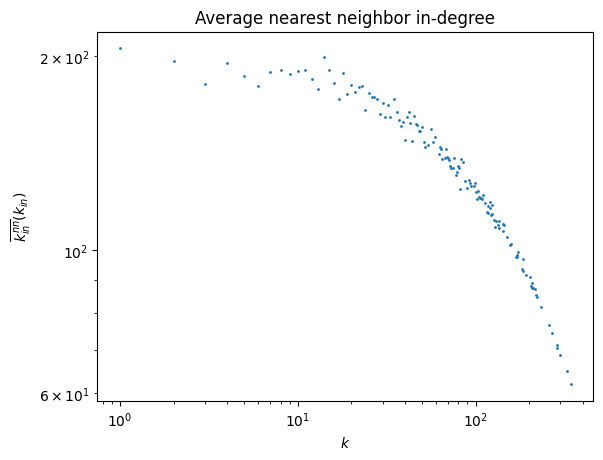

In [ ]:
from matplotlib import pyplot as plt
_, annd_k_in = network_properties.annd(graph, mode='in')
plt.scatter(range(1, len(annd_k_in)+1), annd_k_in, s=1)
plt.xscale('log')
plt.yscale('log')
plt.title('Average nearest neighbor in-degree')
plt.xlabel(r'$k$')
plt.ylabel(r'$\overline{k^{nn}_{in}}(k_{in})$')

## DebtRank

In [3]:
from scipy import linalg

In [19]:
def compute_max_eigval(graph):
    adj = np.array(graph.get_adjacency(attribute="weight").data)
    e_vals = np.abs(linalg.eigvals(adj))
    return max(e_vals)

### On ensemble, differ z

In [37]:
from tqdm import tqdm

In [38]:
n=100
ensemble_arr = []
z_arr = np.logspace(-6, 1, 8)

In [39]:
z_arr

array([1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01])

In [40]:
for z in tqdm(z_arr):
    ensemble_arr.append(renormalizable_model.generate_RM_ensemble(n, strenghts, z, weighted=True))

100%|██████████| 8/8 [03:13<00:00, 24.20s/it]


In [41]:
all_max_eigvals = []
for i in tqdm(range(8)):
    all_max_eigvals.append([compute_max_eigval(graph) for graph in tqdm(ensemble_arr[i])])

100%|██████████| 8/8 [00:48<00:00,  6.09s/it]


In [60]:
max_array = [np.max(eigvals) for eigvals in all_max_eigvals]
min_array = [np.min(eigvals) for eigvals in all_max_eigvals]
mean_array = [np.mean(eigvals) for eigvals in all_max_eigvals]

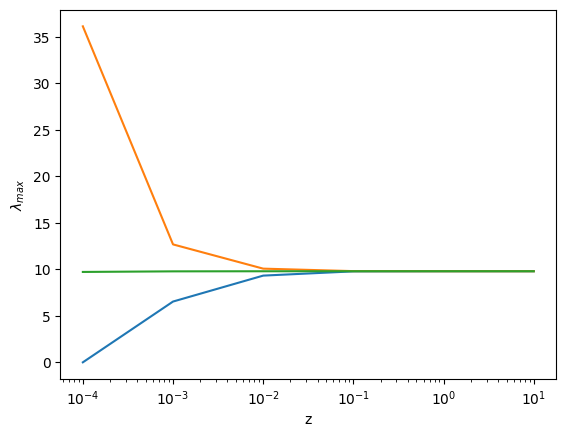

In [96]:
plt.plot(z_arr[2:], min_array[2:])
plt.plot(z_arr[2:], max_array[2:])
plt.plot(z_arr[2:], mean_array[2:])
plt.xlabel("z")
plt.ylabel(r'$\lambda_{max}$')
plt.xscale("log")

### Merging nodes

In [80]:
from src import coarse_graining

#### z = 10<sup>-3</sup>

In [82]:
ensemble = ensemble_arr[3]

In [83]:
merge_nodes_numbers = [1,50,100,150,200,250,300,350,400,450,500]

In [84]:
coarse_grained_endemble_array = [[coarse_graining.coarse_grain_weighted_graph(graph, coarse_graining.merge_n_group(graph,i)) for graph in tqdm(ensemble)] for i in tqdm(merge_nodes_numbers)]

100%|██████████| 11/11 [00:32<00:00,  2.92s/it]


In [88]:
max_eigvals_coarsegrained = [[compute_max_eigval(graph) for graph in tqdm(ensemble)] for ensemble in coarse_grained_endemble_array]

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [00:00<00:00, 58375.84it/s]


In [92]:
max_array_coarsegrained = [np.max(eigvals) for eigvals in max_eigvals_coarsegrained]
min_array_coarsegrained = [np.min(eigvals) for eigvals in max_eigvals_coarsegrained]
mean_array_coarsegrained = [np.mean(eigvals) for eigvals in max_eigvals_coarsegrained]

Text(0.5, 1.0, '$\\lambda_{max}$ for fixed $z=10^{-3}$')

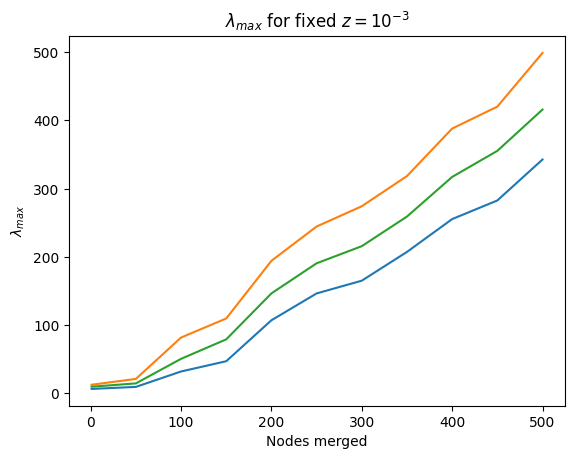

In [101]:
plt.plot(merge_nodes_numbers, min_array_coarsegrained)
plt.plot(merge_nodes_numbers, max_array_coarsegrained)
plt.plot(merge_nodes_numbers, mean_array_coarsegrained)
plt.xlabel("Nodes merged")
plt.ylabel(r'$\lambda_{max}$')
plt.title(r'$\lambda_{max}$ for fixed $z=10^{-3}$')

#### z = 10<sup>-4</sup>

In [102]:
ensemble = ensemble_arr[2]
merge_nodes_numbers = [1,50,100,150,200,250,300,350,400,450,500]
coarse_grained_endemble_array = [[coarse_graining.coarse_grain_weighted_graph(graph, coarse_graining.merge_n_group(graph,i)) for graph in tqdm(ensemble)] for i in tqdm(merge_nodes_numbers)]
max_eigvals_coarsegrained = [[compute_max_eigval(graph) for graph in tqdm(ensemble)] for ensemble in coarse_grained_endemble_array]
max_array_coarsegrained = [np.max(eigvals) for eigvals in max_eigvals_coarsegrained]
min_array_coarsegrained = [np.min(eigvals) for eigvals in max_eigvals_coarsegrained]
mean_array_coarsegrained = [np.mean(eigvals) for eigvals in max_eigvals_coarsegrained]

100%|██████████| 100/100 [00:00<00:00, 48332.61it/s]


Text(0.5, 1.0, '$\\lambda_{max}$ for fixed $z=10^{-4}$')

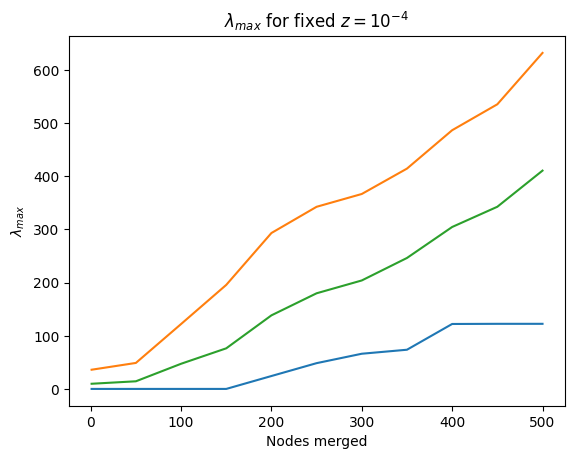

In [103]:
plt.plot(merge_nodes_numbers, min_array_coarsegrained)
plt.plot(merge_nodes_numbers, max_array_coarsegrained)
plt.plot(merge_nodes_numbers, mean_array_coarsegrained)
plt.xlabel("Nodes merged")
plt.ylabel(r'$\lambda_{max}$')
plt.title(r'$\lambda_{max}$ for fixed $z=10^{-4}$')

#### z = 10<sup>-2</sup>

In [104]:
ensemble = ensemble_arr[4]
merge_nodes_numbers = [1,50,100,150,200,250,300,350,400,450,500]
coarse_grained_endemble_array = [[coarse_graining.coarse_grain_weighted_graph(graph, coarse_graining.merge_n_group(graph,i)) for graph in tqdm(ensemble)] for i in tqdm(merge_nodes_numbers)]
max_eigvals_coarsegrained = [[compute_max_eigval(graph) for graph in tqdm(ensemble)] for ensemble in coarse_grained_endemble_array]
max_array_coarsegrained = [np.max(eigvals) for eigvals in max_eigvals_coarsegrained]
min_array_coarsegrained = [np.min(eigvals) for eigvals in max_eigvals_coarsegrained]
mean_array_coarsegrained = [np.mean(eigvals) for eigvals in max_eigvals_coarsegrained]

100%|██████████| 100/100 [00:00<00:00, 55590.51it/s]


Text(0.5, 1.0, '$\\lambda_{max}$ for fixed $z=10^{-2}$')

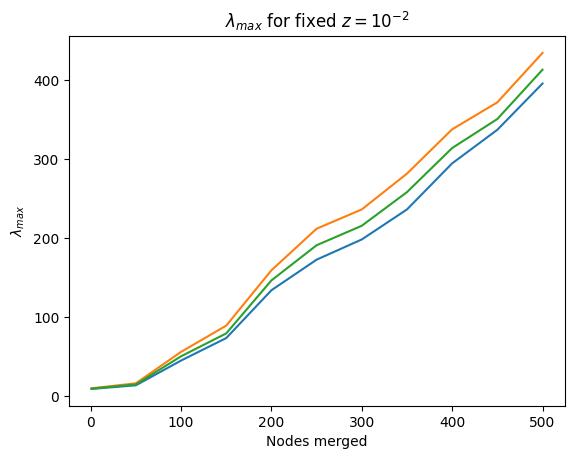

In [105]:
plt.plot(merge_nodes_numbers, min_array_coarsegrained)
plt.plot(merge_nodes_numbers, max_array_coarsegrained)
plt.plot(merge_nodes_numbers, mean_array_coarsegrained)
plt.xlabel("Nodes merged")
plt.ylabel(r'$\lambda_{max}$')
plt.title(r'$\lambda_{max}$ for fixed $z=10^{-2}$')

#### With equity

In [114]:
def create_RM_graph_equities(strenghts, equities, z, weighted=False):
    graph = renormalizable_model.create_RM_graph(strenghts, z, weighted)
    graph.vs["equity"] = equities
    return graph

In [115]:
def generate_RM_ensemble_equities(n, strenghts, equities, z, weighted=False):
    return [create_RM_graph_equities(strenghts, equities, z, weighted) for i in tqdm(range(n))]

In [130]:
def coarse_grain_weighted_graph_equities(graph, group_sequence):
    new_graph = ig.Graph(len(group_sequence), edges=[], directed=True)
    edges_to_add = []
    weights_to_add = []
    for i in range(len(group_sequence)):
        for j in range(len(group_sequence)):
            connected = False
            total_weight = 0
            for k in group_sequence[i]:
                for l in group_sequence[j]:
                    #print(k, l)
                    if graph.are_connected(k, l):
                        #print(k, l, "connected, adding weight", graph.es[graph.get_eid(k,l)]["weight"])
                        connected = True
                        total_weight += graph.es[graph.get_eid(k,l)]["weight"]
            if connected:
                edges_to_add.append((i,j))
                weights_to_add.append(total_weight)
    equities_to_add = np.zeros(len(group_sequence))
    for i in range(len(group_sequence)):
        for id in group_sequence[i]:
            equities_to_add[i] += graph.vs[id]["equity"]
    new_graph.add_edges(edges_to_add)
    new_graph.es["weight"] = weights_to_add
    new_graph.vs["equity"] = equities_to_add
    return new_graph

In [119]:
def debt_rank_max_eqigenvalue(graph):
    adj = np.array(graph.get_adjacency(attribute="weight").data)
    for i in range(len(adj)):
        adj[i] = adj[i]/graph.vs[i]["equity"]
    e_vals = np.abs(linalg.eigvals(adj))
    return max(e_vals)

#### z = 10<sup>-4</sup>

In [134]:
n=100
equities = np.ones(n)
ensemble = generate_RM_ensemble_equities(n, strenghts, equities, z=10**(-4), weighted=True)

100%|██████████| 100/100 [00:23<00:00,  4.34it/s]


In [135]:
merge_nodes_numbers = [1,50,100,150,200,250,300,350,400,450,500]
coarse_grained_endemble_array = [[coarse_grain_weighted_graph_equities(graph, coarse_graining.merge_n_group(graph,i)) for graph in tqdm(ensemble)] for i in tqdm(merge_nodes_numbers)]
max_eigvals_coarsegrained = [[debt_rank_max_eqigenvalue(graph) for graph in tqdm(ensemble)] for ensemble in coarse_grained_endemble_array]
max_array_coarsegrained = [np.max(eigvals) for eigvals in max_eigvals_coarsegrained]
min_array_coarsegrained = [np.min(eigvals) for eigvals in max_eigvals_coarsegrained]
mean_array_coarsegrained = [np.mean(eigvals) for eigvals in max_eigvals_coarsegrained]

100%|██████████| 100/100 [00:00<00:00, 41116.60it/s]


Text(0.5, 1.0, '$\\lambda_{max}$ for fixed $z=10^{-4}$')

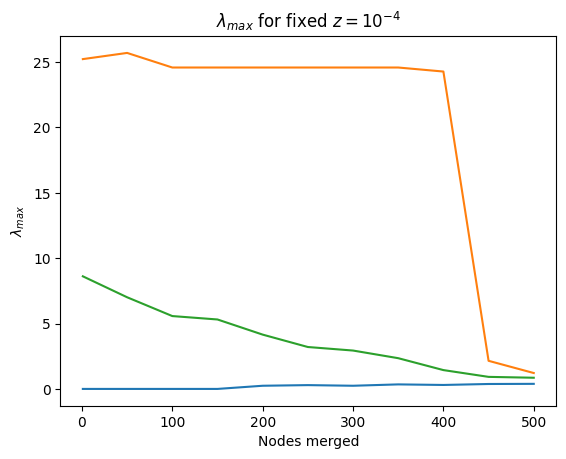

In [136]:
plt.plot(merge_nodes_numbers, min_array_coarsegrained)
plt.plot(merge_nodes_numbers, max_array_coarsegrained)
plt.plot(merge_nodes_numbers, mean_array_coarsegrained)
plt.xlabel("Nodes merged")
plt.ylabel(r'$\lambda_{max}$')
plt.title(r'$\lambda_{max}$ for fixed $z=10^{-4}$')

#### z = 10<sup>-2</sup>

In [137]:
n=100
equities = np.ones(n)
ensemble = generate_RM_ensemble_equities(n, strenghts, equities, z=10**(-2), weighted=True)

100%|██████████| 100/100 [00:23<00:00,  4.32it/s]


In [138]:
merge_nodes_numbers = [1,50,100,150,200,250,300,350,400,450,500]
coarse_grained_endemble_array = [[coarse_grain_weighted_graph_equities(graph, coarse_graining.merge_n_group(graph,i)) for graph in tqdm(ensemble)] for i in tqdm(merge_nodes_numbers)]
max_eigvals_coarsegrained = [[debt_rank_max_eqigenvalue(graph) for graph in tqdm(ensemble)] for ensemble in coarse_grained_endemble_array]
max_array_coarsegrained = [np.max(eigvals) for eigvals in max_eigvals_coarsegrained]
min_array_coarsegrained = [np.min(eigvals) for eigvals in max_eigvals_coarsegrained]
mean_array_coarsegrained = [np.mean(eigvals) for eigvals in max_eigvals_coarsegrained]

100%|██████████| 100/100 [00:00<00:00, 52599.75it/s]


Text(0.5, 1.0, '$\\lambda_{max}$ for fixed $z=10^{-2}$')

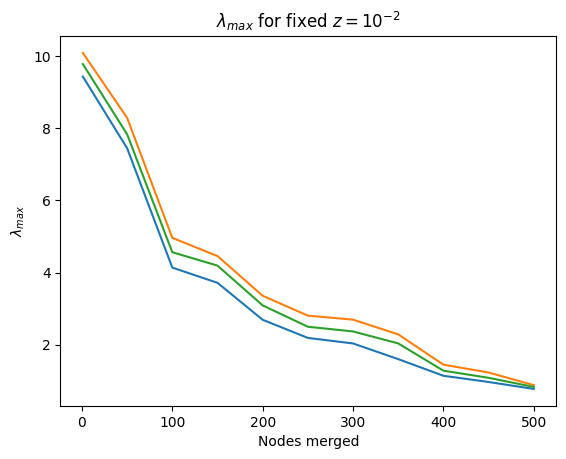

In [139]:
plt.plot(merge_nodes_numbers, min_array_coarsegrained)
plt.plot(merge_nodes_numbers, max_array_coarsegrained)
plt.plot(merge_nodes_numbers, mean_array_coarsegrained)
plt.xlabel("Nodes merged")
plt.ylabel(r'$\lambda_{max}$')
plt.title(r'$\lambda_{max}$ for fixed $z=10^{-2}$')